In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# # Import the required libraries 

In [ ]:
import pandas as pd
import numpy as np
import os
import math
from sklearn.preprocessing import LabelEncoder

# # Import the dataset

In [ ]:
d=pd.read_csv("/content/drive/MyDrive/ML/titanic.csv")


In [ ]:
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# # High Level Overview of Data 

In [ ]:
d.shape

(891, 12)

In [ ]:
#checking for detailed information of dataset
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 # 1. Data Preprocessing 

In [ ]:
#checking for NULL values
d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
d.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#droping the 'Cabin' column as it has lots of empty entries
d=d.drop(['Cabin'],axis=1)

In [ ]:
age_mean=d['Age'].mean()
age_mean

29.69911764705882

In [ ]:
#replacing missing values of age column with mean of all values of age column
d['Age']=d['Age'].replace(to_replace=np.nan,value=age_mean)
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
d.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
#removing unnecessary columns
d=d.drop(['Ticket'],axis=1)
d=d.drop(['Name'],axis=1)
d=d.drop(['PassengerId'],axis=1)
d

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
d=d.dropna(subset=['Embarked'])
d

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


# # Label Encoding 

In [ ]:
d['Sex'].unique()

array([1, 0])

In [ ]:
d['Embarked'].unique()

array([2, 0, 1])

In [ ]:

le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
l1 = le.fit_transform(d['Sex'])
l2 = le.fit_transform(d['Embarked'])

In [ ]:
d['Sex']=l1
d['Embarked']=l2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# #  Removing duplicate rows

In [ ]:
#finding number of duplicate rows
d.duplicated().sum()

111

In [ ]:
d.drop(axis="rows", labels=d.index[d.duplicated()], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# # **Feature Scailing**

In [ ]:

d['Age']=d['Age'].apply( lambda v:(v-d['Age'].min())/(d['Age'].max()-d['Age'].min(0)))
d['Fare']=d['Fare'].apply(lambda v:(v-d['Fare'].min())/(d['Fare'].max()-d['Fare'].min(0)))
d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
1,1,1,0,0.472229,1,0,0.139136,0
2,1,3,0,0.321438,0,0,0.015469,2
3,1,1,0,0.434531,1,0,0.103644,2
4,0,3,1,0.434531,0,0,0.015713,2
...,...,...,...,...,...,...,...,...
885,0,3,0,0.484795,0,5,0.056848,1
887,1,1,0,0.233476,0,0,0.058556,2
888,0,3,0,0.367921,1,2,0.045771,2
889,1,1,1,0.321438,0,0,0.058556,0


In [ ]:
d.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.333291,-0.511686,-0.084185,-0.036044,0.071352,0.244700,-0.157858
Pclass,-0.333291,1.000000,0.113210,-0.335180,0.085055,0.037218,-0.551236,0.181243
Sex,-0.511686,0.113210,1.000000,0.099034,-0.099980,-0.239210,-0.166952,0.101821
Age,-0.084185,-0.335180,0.099034,1.000000,-0.279150,-0.185872,0.087692,-0.034728
SibSp,-0.036044,0.085055,-0.099980,-0.279150,1.000000,0.380174,0.135490,0.064530
Parch,0.071352,0.037218,-0.239210,-0.185872,0.380174,1.000000,0.192411,0.044173
Fare,0.244700,-0.551236,-0.166952,0.087692,0.135490,0.192411,1.000000,-0.239262
Embarked,-0.157858,0.181243,0.101821,-0.034728,0.064530,0.044173,-0.239262,1.000000


In [ ]:
d.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.244700
Parch       0.071352
SibSp      -0.036044
Age        -0.084185
Embarked   -0.157858
Pclass     -0.333291
Sex        -0.511686
Name: Survived, dtype: float64

In [ ]:
d.cov()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,0.242446,-0.140018,-0.121904,-0.007123,-0.017552,0.029489,0.012295,-0.062597
Pclass,-0.140018,0.727960,0.046736,-0.049141,0.071768,0.026653,-0.047993,0.124535
Sex,-0.121904,0.046736,0.234109,0.008234,-0.047841,-0.097147,-0.008243,0.039675
Age,-0.007123,-0.049141,0.008234,0.029527,-0.047438,-0.026808,0.001538,-0.004806
SibSp,-0.017552,0.071768,-0.047841,-0.047438,0.978035,0.315573,0.013673,0.051394
Parch,0.029489,0.026653,-0.097147,-0.026808,0.315573,0.704503,0.016480,0.029859
Fare,0.012295,-0.047993,-0.008243,0.001538,0.013673,0.016480,0.010413,-0.019662
Embarked,-0.062597,0.124535,0.039675,-0.004806,0.051394,0.029859,-0.019662,0.648563


In [ ]:
d.cov()['Survived'].sort_values(ascending=False)

Survived    0.242446
Parch       0.029489
Fare        0.012295
Age        -0.007123
SibSp      -0.017552
Embarked   -0.062597
Sex        -0.121904
Pclass     -0.140018
Name: Survived, dtype: float64

([<matplotlib.axis.XTick at 0x7f3e7a241c10>,
 [Text(0, 0, 'Survived'),
  Text(0, 0, 'Pclass'),
  Text(0, 0, 'Sex'),
  Text(0, 0, 'Age'),
  Text(0, 0, 'SibSp'),
  Text(0, 0, 'Parch'),
  Text(0, 0, 'Fare'),
  Text(0, 0, 'Embarked')])

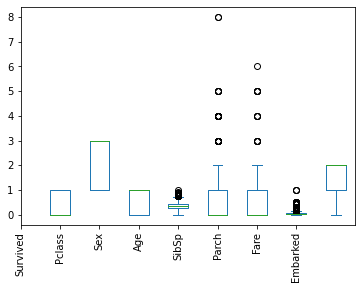

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

d.plot.box()
plt.xticks(list(range(len(d.columns))),d.columns,rotation='vertical')

# 2.Splitting the DataSet

In [ ]:
#Checking the dimension of data before splitting it into train and test
d.shape

(778, 8)

In [ ]:
# train dataset=80% , test dataset=20%
# Ouput column (y) is 'Survived' column
train_data=d.sample(frac=0.80,replace=False)
test_data=d.drop(train_data.index)

#convert dataframe to numpy array
train_data=train_data.to_numpy()
test_data=test_data.to_numpy()

#Remove Survived Column
x_train=np.delete(train_data,0,1)
x_test=np.delete(test_data,0,1)

#Survived Column is used for output vector
y_train=train_data[:,0]
y_test=test_data[:,0]

In [ ]:
x_train

array([[1.        , 1.        , 0.23347575, ..., 0.        , 0.1036443 ,
        2.        ],
       [2.        , 0.        , 0.2083438 , ..., 0.        , 0.02342244,
        0.        ],
       [3.        , 1.        , 0.39683338, ..., 0.        , 0.01546857,
        2.        ],
       ...,
       [3.        , 1.        , 0.52249309, ..., 1.        , 0.01640391,
        2.        ],
       [1.        , 1.        , 0.560191  , ..., 0.        , 0.06929139,
        2.        ],
       [2.        , 1.        , 0.44709726, ..., 0.        , 0.02049464,
        2.        ]])

In [ ]:
x_test

array([[1.        , 1.        , 0.67328474, ..., 0.        , 0.10122886,
        2.        ],
       [3.        , 1.        , 0.24604172, ..., 0.        , 0.01571255,
        2.        ],
       [3.        , 1.        , 0.01985423, ..., 1.        , 0.05684821,
        1.        ],
       ...,
       [3.        , 1.        , 0.40939935, ..., 0.        , 0.01541158,
        2.        ],
       [2.        , 1.        , 0.34656949, ..., 0.        , 0.02049464,
        2.        ],
       [3.        , 1.        , 0.39683338, ..., 0.        , 0.01512699,
        1.        ]])

In [ ]:
print(x_train.shape)

(622, 7)


In [ ]:
print(x_test.shape)

(156, 7)


In [ ]:
print(y_train.shape)

(622,)


In [ ]:
print(y_test.shape)

(156,)


In [ ]:
x_train = x_train.T
y_train = y_train.reshape((1, 622))

x_test = x_test.T
y_test = y_test.reshape((1, 156))

In [ ]:
print("Shape of X_train : ", x_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", x_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (7, 622)
Shape of Y_train :  (1, 622)
Shape of X_test :  (7, 156)
Shape of Y_test :  (1, 156)


# 3. Modeling

# 3-a Logistic Regression Using Gradient Descent

# # Sigmoid Function


In [ ]:
#function for sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
def model(x, y, learning_rate, iterations):
    
    m = x_train.shape[1]
    n = x_train.shape[0]
    
    #initialising with zeroes
    w = np.zeros((n,1))
    
    #parameter
    b = 0 
    
    cost_l = []
    
    for i in range(iterations):
        
        z = np.dot(w.T, x) + b
        a = sigmoid(z)
        
        # Cost function
        cost = -(1/m)*np.sum( y*np.log(a) + (1-y)*np.log(1-a))
        
        # Gradient Descent
        dW = (1/m)*np.dot(a-y, x.T)
        dB = (1/m)*np.sum(a - y)
        
        w = w - learning_rate*dW.T
        b = b - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_l.append(cost)
        
        if(i%(iterations/10) == 0):
            print(cost)
        
    return w, b, cost_l
        

In [ ]:
iterations = 100000
learning_rate = 0.0015
w, b, cost_list = model(x_train, y_train,learning_rate =learning_rate, iterations=iterations)

0.6931471805599453
0.5558669328205121
0.5229499592776231
0.5071490642853778
0.4980509034330481
0.4921340158431143
0.48793499413370406
0.48475178452546713
0.48221315876280885
0.4801090667766562


# # F1 score calculation 

In [ ]:
z=np.dot(w.T,x_test)+b
pred_y=sigmoid(z);
pred_y=pred_y>0.5
pred_y=np.array(pred_y,dtype='int64')
pred_y

array([[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 0]])

In [ ]:
y_test=np.array(y_test,dtype='int64')
y_test

array([[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 0]])

***True Positive (TP)***: True positive measures the extent to which the model correctly predicts the positive class. That is, the model predicts that the instance is positive, and the instance is actually positive. True positives are relevant when we want to know how many positives our model correctly predicts.

***False Positive (FP)***: False positives occur when the model predicts that an instance belongs to a class that it actually does not. False positives can be problematic because they can lead to incorrect decision-making.

***True Negative (TN)***: True negatives are the outcomes that the model correctly predicts as negative.

***False Negative (FN)***: A false negative occurs when a model predicts an instance as negative when it is actually positive.

In [ ]:
TP=np.sum((pred_y==1)& (y_test==1))
FP=np.sum((pred_y==1)& (y_test==0))
TN=np.sum((pred_y==0)& (y_test==0))
FN=np.sum((pred_y==0)& (y_test==1))

***Recall Score*** : Model recall score represents the model’s ability to correctly predict the positives out of actual positives. This is unlike precision which measures how many predictions made by models are actually positive out of all positive predictions made.

In [ ]:
R=TP/(FN+TP)
R

0.5932203389830508

***Precision Score*** : The model precision score measures the proportion of positively predicted labels that are actually correct. Precision is also known as the positive predictive value. Precision is used in conjunction with the recall to trade-off false positives and false negatives.

In [ ]:
P=TP/(TP+FP)
P

0.6481481481481481

**F1 Score** : Model F1 score represents the model score as a function of precision and recall score. F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall for measuring its performance in terms of accuracy, making it an alternative to Accuracy metrics (it doesn’t require us to know the total number of observations).

In [ ]:
#f1 score calculation to validate the model
f1_s=2*(R*P)/(R+P)
print("The F1 score is ",f1_s*100)
print("Error % is",(1-f1_s)*100)


The F1 score is  61.94690265486725
Error % is 38.05309734513275


# # Graph Plotting

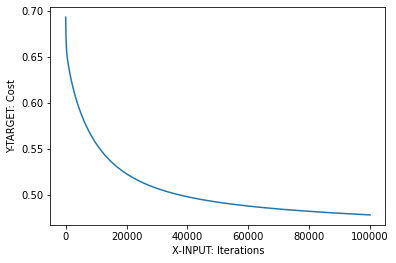

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(iterations), cost_list)
plt.xlabel('X-INPUT: Iterations')
plt.ylabel('Y-TARGET: Cost')
plt.show()

# 3-b Naive Bayes

In [ ]:
x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T

# # Spliting dataset into Survived and non-Survived:

In [ ]:
x_train_sur = [] #array for survived entries 
x_train_nsur = [] #array for non-survived entries
for i in range(len(y_train)):
    if((y_train[i]) == 1):
        x_train_sur.append(x_train[i])
    else:
        x_train_nsur.append(x_train[i])

# # Finding mean and variance:

In [ ]:
Sur_Mean = np.mean(x_train_sur, axis=0) 
Nsur_Mean = np.mean(x_train_nsur, axis=0)
Sur_Var = np.var(x_train_sur, axis=0)
Nsur_Var = np.var(x_train_nsur, axis=0)
Sur_Mean
Nsur_Mean
Sur_Var
Nsur_Var


array([0.60849748, 0.13296399, 0.02639368, 1.20829337, 0.69094006,
       0.0043945 , 0.53739612])

# # Probability of Survived People

In [ ]:
p_sur = np.count_nonzero(y_train)/len(y_train)
p_sur


0.41961414790996787

# # Probability of Unsurvived People

In [78]:
p_nsur = 1-p_sur
p_nsur

0.5803858520900321

# # Gaussian Function 

In [ ]:
def Gaussian(mean, variance, x):
    deno = np.prod(np.sqrt(2.0*np.pi*variance))
    power = -1.0*(x-mean)*(x-mean)/(2.0*variance)
    return np.prod(np.exp(power))/deno

# # Inference Function

In [ ]:
def Inference(Sur_Mean, Sur_Var,Nsur_Mean, Nsur_Var,x, p_sur):
    gauss_Sur=Gaussian(Sur_Mean, Sur_Var, x)
    gauss_Nsur = Gaussian(Nsur_Mean,Nsur_Var, x)
    pS = p_sur*gauss_Sur
    pNS = p_nsur*gauss_Nsur
    if(pS > pNS):
        return 1
    return 0

In [ ]:
y_pred2=[]
for i in range(len(x_test)):
    y_pred2.append(Inference(Sur_Mean, Sur_Var,Nsur_Mean, Nsur_Var,x_test[i], p_sur))

In [ ]:
y_pred2

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0]

In [ ]:
y_pred2=np.array(y_pred2,dtype='int64')
y_pred2.shape

(156,)

In [ ]:
y_pred2=y_pred2.reshape(156,1).T
y_pred2.shape


(1, 156)

In [ ]:
y_pred2

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 0]])

In [ ]:
y_test=y_test.T
y_test

array([[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 0]])

In [ ]:
TP2=np.sum((y_pred2==1)& (y_test==1))
FP2=np.sum((y_pred2==1)& (y_test==0))
TN2=np.sum((y_pred2==0)& (y_test==0))
FN2=np.sum((y_pred2==0)& (y_test==1))
R2=TP2/(TP2+FN2)
R2

0.6610169491525424

In [ ]:
P2=TP2/(TP2+FP2)
P2

0.7090909090909091

In [ ]:
#f1 score calculation to validate the model
f1_s2=2*(R2*P2)/(R2+P2)
print("The F1 score is ",f1_s2*100)
print("Error % is",(1-f1_s2)*100)

The F1 score is  68.42105263157895
Error % is 31.57894736842105
